In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


sys.path.append('../')
from methods.load import load_observations
from methods.utils import get_overlapping_datetime_indices

# Load obs data
I = load_observations('inflow', data_dir='../data/', as_numpy=False)
S = load_observations('storage', data_dir='../data/', as_numpy=False)
R = load_observations('release', data_dir='../data/', as_numpy=False)
I.head(1)

,prompton,beltzvilleCombined,fewalter,blueMarsh
1945-01-01,NaN,NaN,84.004757,NaN


In [8]:
# Find the overlapping datetime indices for the inflow, storage, and release data
# for each reservoir

for res in ['fewalter',
            'beltzvilleCombined',
            'prompton']:

    dt = get_overlapping_datetime_indices(I[res], 
                                      S[res], 
                                      R[res],)

    print(f'Start date for {res}: {dt[0]}')
    print(f'End date for {res}: {dt[-1]}')


reservoir_name = 'fewalter'
dt = get_overlapping_datetime_indices(I[reservoir_name],
                                        S[reservoir_name],
                                        R[reservoir_name])


Start date for fewalter: 2016-10-01 00:00:00
End date for fewalter: 2022-12-31 00:00:00
Start date for beltzvilleCombined: 2009-10-14 00:00:00
End date for beltzvilleCombined: 2022-12-31 00:00:00
Start date for prompton: 2016-10-01 00:00:00
End date for prompton: 2022-12-31 00:00:00


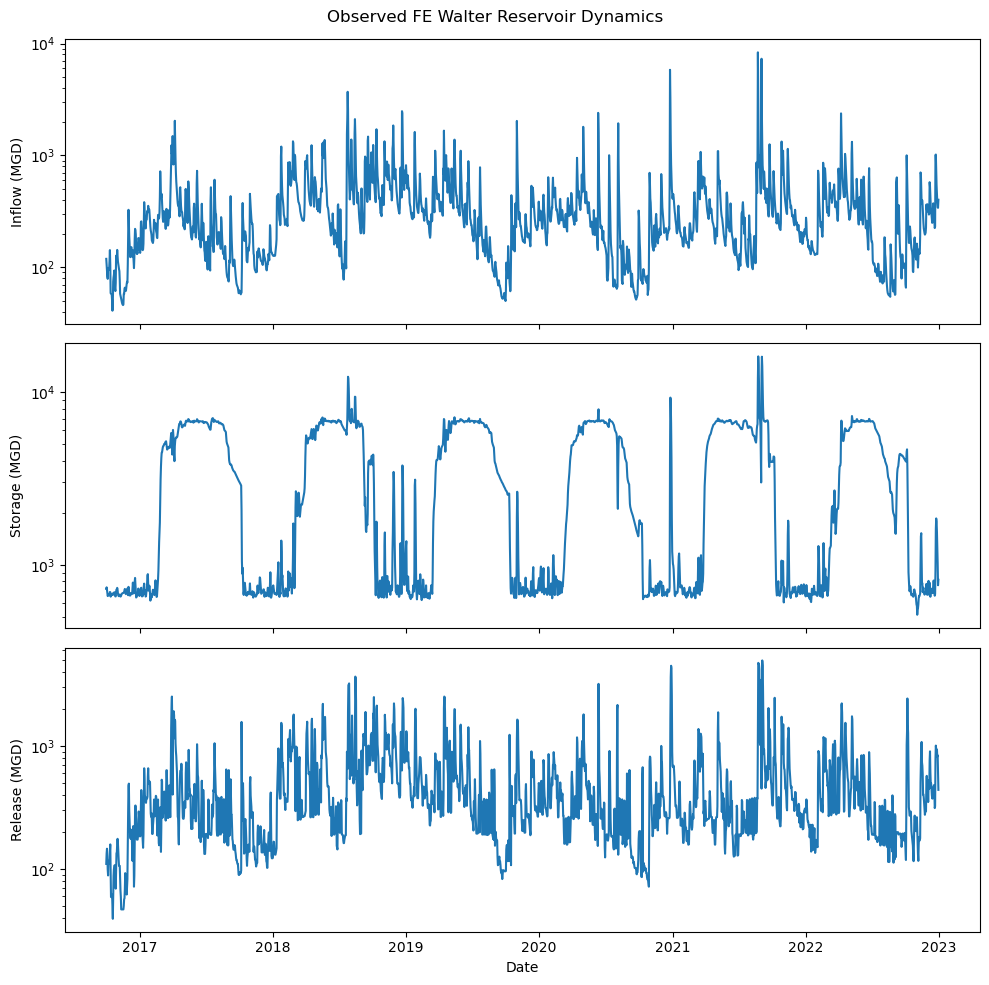

(<Figure size 1000x1000 with 3 Axes>,
 array([<Axes: ylabel='Inflow (MGD)'>, <Axes: ylabel='Storage (MGD)'>,
        <Axes: xlabel='Date', ylabel='Release (MGD)'>], dtype=object))

In [9]:
from methods.plotting import plot_obs_reservoir_dynamics

plot_obs_reservoir_dynamics(I.loc[dt,:], 
                            S.loc[dt,:], 
                            R.loc[dt,:], 
                            reservoir_name, 
                            title='Observed FE Walter Reservoir Dynamics')   

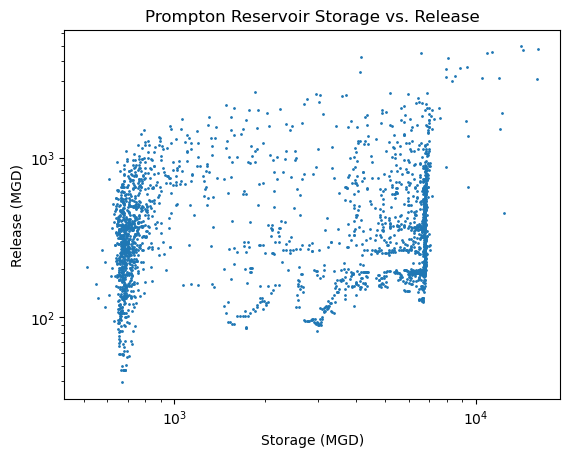

In [10]:
plt.scatter(S.loc[dt, reservoir_name], R.loc[dt, reservoir_name], s=1)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Storage (MGD)')
plt.ylabel('Release (MGD)')
plt.title('Prompton Reservoir Storage vs. Release')
plt.show()

